
# MLG382 GROUP PROJECT  [100 Marks] 
**Lecturer: _K. Igwe_**


# Your task is to predict *median house values* in Western cape, given a number of features from the districts 


The first question to ask before building a model is what exactly the business objective is. How does the client expect to use and benefit from the model? The objective is important in determining how you will frame the problem, the algorithms to select, the performance measure to use for your model evaluation, and the level of effort you will spend tweaking your model.

In this project, you should assume that your model’s output (a prediction of a district’s median housing price) will be fed to
another Machine Learning system along with many other determinats to better understand the risk of investing in a given area of the Western Cape. The data (home.csv) are provided alonside this notebook. 

This checklist can guide you through the projects.
1. Frame the problem and look at the big picture (done for you).
2. Get the data (made available for you).
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.
5. Explore many different models and shortlist the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.

### Aim
- Lecturers aim: To expose you to practical applications of ML. 
- Your aim:  to predict median house values in Western cape, given a number of features from the province. 

### Skills Tested
- Basic Python Programming
- EDA
- Use of sklearn Library
- choosing the right model and Building a classification Model
- Understanding and using different evaluation techniques
- Reporting 

### Instructions and Directions
1. _**your code here**_  or  _**your answer here**_ need to be deleted and replaced with your code or answer
2. You may use more than one cell to answer a question
3. Ensure that you include appropriate comment
4. If your code requires special instruction or dependencies to run, please provide these in your submission 

### NOTE: 80% is for meeting requirement, 20% will be awarded based on extra work. I have provided some guide where I enticipate that you may need extra help.

- Tebogo Gerald Nkwane - 576583
- Thapelo Tlhako - 576525
- Phomelelo Monama - 576196
- Dithapelo Huma - 576364
- Neo Matsapola - 576550

## RUBRIC

1. Frame the problem and look at the big picture (done for you) [2].
2. Get the data (made available for you) [2].
3. Explore the data to gain insights [10]
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms [20]
5. Explore many different models (at least 3) and shortlist the best ones [30].
6. Fine-tune your models. [10]
7. Present your solution [20].

##  Frame the problem and look at the big picture (done for you).

In [606]:
# Nothing Required here. Good Luck!
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors 
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import numpy as np

## Get the data (made available for you) [0].

In [502]:
home_df = pd.read_csv('home.csv', header=0)
home_df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15170,-117.07,33.01,25.0,2120.0,381.0,588.0,359.0,3.1187,169400.0,<1H OCEAN
10237,-117.87,33.91,16.0,2434.0,455.0,1017.0,476.0,4.2188,176300.0,<1H OCEAN
18695,-122.39,40.58,44.0,1625.0,392.0,944.0,347.0,1.5972,68900.0,INLAND
690,-122.12,37.70,17.0,2488.0,617.0,1287.0,538.0,2.9922,179900.0,NEAR BAY
11868,-121.09,40.30,15.0,1717.0,336.0,501.0,206.0,3.6477,113400.0,INLAND


## Explore the data to gain insights [10] BONUS [5]

 hints!
- check for correlations: features with the label. And features with one another
- use graphs to illustrate similarities and differences as you deem neccessary
- NOTE: Features with non-linear relationships will have little or no correlation but may still be very instrumental in your predictions
- Test combinations of features (for example, new feature = old_feature1/old_feature2 )

In [503]:
ocean_proximity_choices = home_df['ocean_proximity'].unique()
ocean_proximity_choices

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [504]:
# Create binary (0 or 1) columns for each ocean_proximity choice
for choice in ocean_proximity_choices:
    home_df[choice] = home_df['ocean_proximity'] == choice 
home_df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
6234,-117.95,34.06,32.0,2252.0,415.0,1370.0,411.0,4.6312,184800.0,<1H OCEAN,False,True,False,False,False
8921,-118.48,34.02,25.0,1583.0,460.0,983.0,422.0,2.7019,293800.0,<1H OCEAN,False,True,False,False,False
19971,-119.11,36.21,10.0,1972.0,455.0,1469.0,442.0,1.5407,58400.0,INLAND,False,False,True,False,False
7236,-118.14,34.01,42.0,1973.0,510.0,1841.0,502.0,2.5326,156500.0,<1H OCEAN,False,True,False,False,False
19613,-121.14,37.46,4.0,2919.0,503.0,1592.0,491.0,5.2452,161900.0,INLAND,False,False,True,False,False


In [505]:
for choice in ocean_proximity_choices:
  home_df[choice] = home_df[choice].astype(int)
home_df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
13549,-117.31,34.13,36.0,1076.0,283.0,773.0,224.0,2.6307,66400.0,INLAND,0,0,1,0,0
20098,-120.28,37.90,17.0,1047.0,212.0,530.0,196.0,2.1538,153300.0,INLAND,0,0,1,0,0
7032,-118.10,33.96,36.0,2013.0,435.0,1476.0,475.0,3.9549,192100.0,<1H OCEAN,0,1,0,0,0
20074,-120.26,38.13,17.0,301.0,94.0,122.0,47.0,4.0583,87500.0,INLAND,0,0,1,0,0
19523,-121.01,37.65,52.0,178.0,53.0,152.0,62.0,0.4999,82500.0,INLAND,0,0,1,0,0


In [506]:
home_df = home_df.drop(['ocean_proximity'], axis=1)
home_df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
NEAR BAY                0
<1H OCEAN               0
INLAND                  0
NEAR OCEAN              0
ISLAND                  0
dtype: int64

In [507]:
home_df.shape

(20640, 14)

In [508]:
# missing room data -- fill with mean (I usually would remove this as it is 1% of the data)
home_df['total_bedrooms'].fillna(home_df['total_bedrooms'].mean(), inplace=True)
home_df['total_bedrooms'].isna().sum()

0

## Prepare the data to better expose the underlying data patterns to Machine Learning algorithms [20]

 hint!
- remove the corresponding districts.
- remember to deal with th NA's (you can as well do this before now)
- Scale, Normalize, transform some features (e.g., median income can be put into categroies).
- Set the values to some value (zero, the mean, the median, etc.).


In [509]:
home_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.110950,0.442636,0.317393,0.128779,0.000242
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874,0.314077,0.496710,0.465473,0.334963,0.015563
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [510]:
# new colum people per household -- fill with (population/households)
home_df['people_per_household'] = home_df['population'] / home_df['households']
home_df['people_per_household'].sample(10)

9905     2.359107
16676    2.130996
3976     2.826879
18615    2.642578
13940    2.768293
5478     2.435028
15641    1.524178
10899    2.131148
12202    3.341530
15225    3.349727
Name: people_per_household, dtype: float64

In [511]:
# rooms per household -- fill with (total_rooms/households)
home_df['rooms_per_household'] = home_df['total_rooms'] / home_df['households']
home_df['rooms_per_household'].sample(10)

10324    8.789823
8932     4.149000
3834     3.300337
5453     4.619048
13523    5.392361
5294     5.307808
14205    4.548387
10322    7.434579
17914    5.315152
3193     4.628906
Name: rooms_per_household, dtype: float64

In [512]:
# bedrooms per household -- fill with (total_bedrooms/households)
home_df['bedrooms_per_household'] = home_df['total_bedrooms'] / home_df['households']
home_df['bedrooms_per_household'].sample(10)

16147    1.107004
5690     0.980892
2950     1.108392
2827     0.945946
16765    0.973585
20339    1.065527
1048     1.142322
500      1.173554
14446    1.065823
11082    1.073801
Name: bedrooms_per_household, dtype: float64

In [513]:
# people per bedroom -- fill with (population/total_bedrooms)
home_df['people_per_bedroom'] = home_df['population'] / home_df['total_bedrooms']
home_df['people_per_bedroom'].sample(10)

10715    2.258772
11028    2.995652
7801     3.518056
498      1.797500
9734     3.247350
6591     3.173077
2291     3.110754
3491     3.337121
5928     2.397980
4460     1.714607
Name: people_per_bedroom, dtype: float64

In [514]:
# add column old age for median age > 50 -- fill with 0 or 1
home_df['home_with_old_age_majority'] = home_df['housing_median_age'] > 50
home_df['home_with_old_age_majority'] = home_df['home_with_old_age_majority'].astype(int)
home_df['home_with_old_age_majority'].sample(10)


7085     0
19550    0
846      0
17057    0
17956    0
19284    0
19983    0
5099     0
4720     0
13504    0
Name: home_with_old_age_majority, dtype: int32

In [515]:
# column bedrooms as persentage of rooms -- fill with (total_bedrooms/total_rooms)
home_df['bedrooms_as_percentage_of_rooms'] = home_df['total_bedrooms'] / home_df['total_rooms']
home_df['bedrooms_as_percentage_of_rooms'].sample(10)

19643    0.161245
2446     0.260073
13118    0.165044
8884     0.143191
15310    0.272475
20401    0.188610
8109     0.313411
8806     0.136847
1287     0.333333
19258    0.324441
Name: bedrooms_as_percentage_of_rooms, dtype: float64

In [516]:
home_df['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [517]:
# for later
home_df_copy = home_df.copy()

# The Big Idea:

Create a model that will predict the median house value in Western Cape, given a number of features from the districts.
We are attempting to predict price whihc has a wide range of numbers from about 14 000 to 501 000 according to the 5 number summary.
This means that the price is not a single number but a range.
We would have a confusion matrix of about 2000 rows and 2000 coulmns making it (2000x2000 matrix) and making the model accuracy very low. 

 The plan is to then split targets --> median_house_values into 10 groups:
 0. 0-50000
 1. 50000-100000
 2. 100000-150000
 3. 150000-200000
 4. 200000-250000
 5. 250000-300000
 6. 300000-350000
 7. 350000-400000
 8. 400000-450000
 9. 450000-501000

 We indent to train 10 models each being trainsed to check a single group and then we will average the results to get the final prediction.
 Example: when predicting a value instead of having a single model predict this value, in the background you will get 10 results each with a different accuracy and aggregated to get the final prediction. This way you get an idea of where the price is along the range (as opposed to just a single value that determine higih or low)


###### PLEASE NOTE we will only show how this model works in the workings on a logistic regression model. The other models can be created in a similar fashion but will not be shown in this notebook. We will only show for a single value (high or low) but the points (loops, functions, graphs) used in logistic regression are the same for all models with minor aditonal changes. 

In [518]:
# Here we create the groups for the median house value
values = [50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500001]
def categorize_value(median_house_value, value_to_benchmark):
  if median_house_value < value_to_benchmark:
    return 1
  else:
    return 0

In [519]:
# Collections of all the dataframes we will us: They are all the same except for the target that they have (e.g less than 50k or more than 50k etc)
dfs = []
for i in range(10):
  dfs.append(home_df.copy())

len(dfs)

10

In [520]:
# Adding the lable to the dataframe
for i in range(len(dfs)):
  dfs[i]['value'] = dfs[i]['median_house_value'].apply(lambda x: categorize_value(x, values[i]))
# removing the median house value column -- it is the target we created groups for so cant predict target with target column
for df in dfs:
  df.drop(['median_house_value'], axis=1, inplace=True)
# if you want to view and very manually wheather or not the data is correct sample a few fields and check if it does get 1 for <50k or 0 for < 350k etc 
# for df in dfs:
#   print(df.sample(5).T)

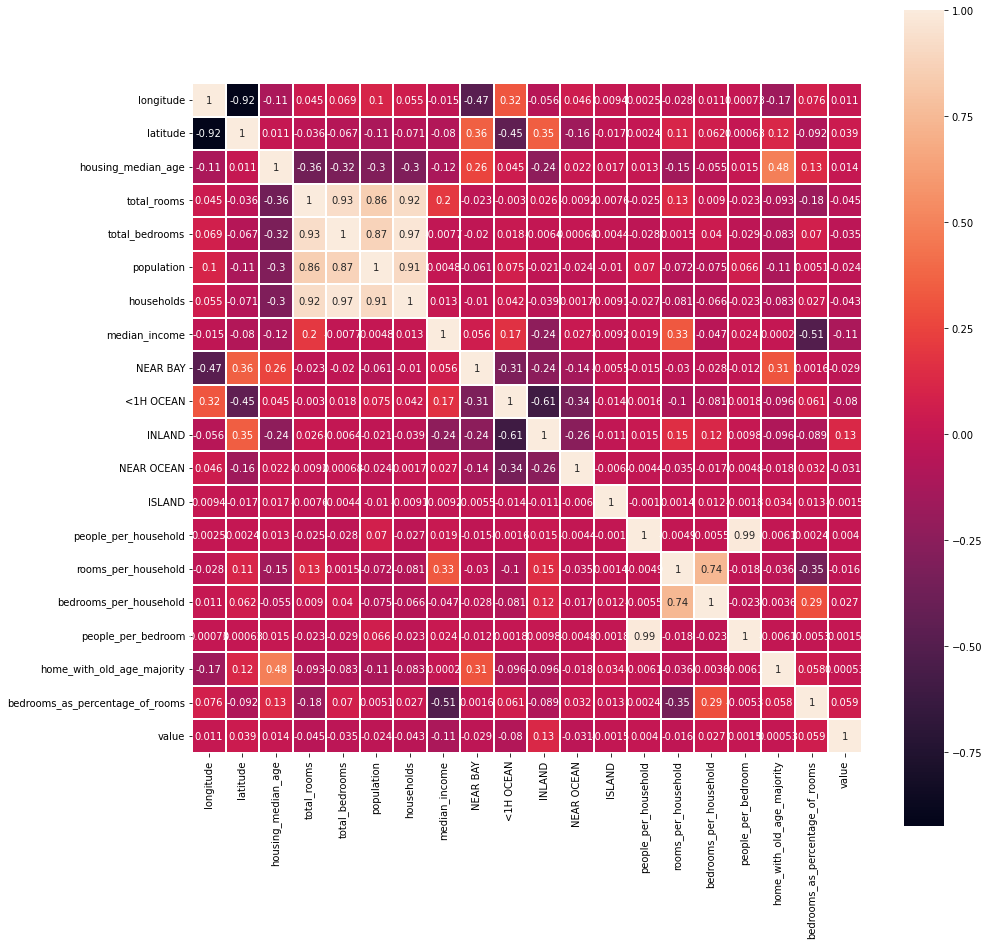

In [521]:
# View all heatmaps --- remove comment on for to see all heatmaps
# for df in dfs:
plt.figure(figsize=(15,15))
sns.heatmap(dfs[0].corr(),linewidths=0.1,vmax=1.0, 
          square=True,  linecolor='white', annot=True)
plt.show()

In [522]:
# Selecting top 11 features to use as features in the model and addinf them to collection
all_top_11_features = []
for df in dfs:
  all_top_11_features.append(abs(df.corr()['value']).sort_values(ascending=False).index[1:12].tolist())
all_top_11_features

[['INLAND',
  'median_income',
  '<1H OCEAN',
  'bedrooms_as_percentage_of_rooms',
  'total_rooms',
  'households',
  'latitude',
  'total_bedrooms',
  'NEAR OCEAN',
  'NEAR BAY',
  'bedrooms_per_household'],
 ['INLAND',
  'median_income',
  '<1H OCEAN',
  'latitude',
  'total_rooms',
  'households',
  'total_bedrooms',
  'NEAR BAY',
  'NEAR OCEAN',
  'bedrooms_as_percentage_of_rooms',
  'population'],
 ['INLAND',
  'median_income',
  '<1H OCEAN',
  'latitude',
  'bedrooms_as_percentage_of_rooms',
  'NEAR BAY',
  'total_rooms',
  'NEAR OCEAN',
  'households',
  'home_with_old_age_majority',
  'total_bedrooms'],
 ['median_income',
  'INLAND',
  '<1H OCEAN',
  'bedrooms_as_percentage_of_rooms',
  'NEAR BAY',
  'total_rooms',
  'NEAR OCEAN',
  'home_with_old_age_majority',
  'rooms_per_household',
  'latitude',
  'housing_median_age'],
 ['median_income',
  'INLAND',
  'bedrooms_as_percentage_of_rooms',
  '<1H OCEAN',
  'home_with_old_age_majority',
  'NEAR BAY',
  'rooms_per_household',
 

In [523]:
# verifying the first dataframe (the less than 50k ZAR)
abs(dfs[0].corr()['value']).sort_values(ascending=False)

value                              1.000000
INLAND                             0.126589
median_income                      0.109282
<1H OCEAN                          0.079943
bedrooms_as_percentage_of_rooms    0.059222
total_rooms                        0.045037
households                         0.043426
latitude                           0.038616
total_bedrooms                     0.035063
NEAR OCEAN                         0.030533
NEAR BAY                           0.028541
bedrooms_per_household             0.027434
population                         0.023965
rooms_per_household                0.015556
housing_median_age                 0.013661
longitude                          0.011253
people_per_household               0.004036
ISLAND                             0.001536
people_per_bedroom                 0.001506
home_with_old_age_majority         0.000534
Name: value, dtype: float64

 ## Explore many different models (at least 3) and shortlist the best ones [20] Bonus [5]

 hint!
- Some with cross_validation
- Tree based models
- Non- Tree based Models
- (don't worry too much about tuning here)

# Separate the data into features and labels.

In [524]:
# Logistic regression 
lables_collection = []
features_collection = []
for i in range(len(dfs)):
  lables_collection.append(dfs[i]['value'])
  features_collection.append(dfs[i][all_top_11_features[i]])

lables_collection[0].sample(5)

11527    0
2302     0
16154    0
85       0
11156    0
Name: value, dtype: int64

In [525]:
features_collection[0].sample(5)

,INLAND,median_income,<1H OCEAN,bedrooms_as_percentage_of_rooms,total_rooms,households,latitude,total_bedrooms,NEAR OCEAN,NEAR BAY,bedrooms_per_household
14917,0,4.6793,0,0.164912,1710.0,297.0,32.62,282.0,1,0,0.949495
9958,1,6.3427,0,0.146811,831.0,109.0,38.39,122.0,0,0,1.119266
19558,1,2.5993,0,0.235877,1009.0,246.0,37.60,238.0,0,0,0.967480
12829,1,3.8611,0,0.189637,965.0,188.0,38.70,183.0,0,0,0.973404
11938,1,3.2500,0,0.224458,3181.0,706.0,33.94,714.0,0,0,1.011331


In [526]:
features_train_collection = []
features_test_collection = []
lables_train_collection = []
lables_test_collection = []
models = []
average_score = 0
for i in range(len(dfs)):
  features_train, features_test, lables_train, lables_test = train_test_split(features_collection[i], lables_collection[i], test_size=0.2, random_state=42)
  features_train_collection.append(features_train)
  features_test_collection.append(features_test)
  lables_train_collection.append(lables_train)
  lables_test_collection.append(lables_test)

# Create model pipeline

In [527]:
def train_logistic_regression(features_train_collection, lables_train_collection):
  models = []
  for i in range(len(features_train_collection)):
    scaler = StandardScaler()
    features_train = scaler.fit_transform(features_train_collection[i])
    lr = LogisticRegression(solver='lbfgs', max_iter=1500)
    lr.fit(features_train, lables_train_collection[i])
    models.append(lr)
  return models

In [528]:
def predict_logistic_regression(models, features_test_collection):
  predictions = []
  for i in range(len(models)):
    prediction = models[i].predict(features_test_collection[i])
    predictions.append(prediction)
  return predictions

In [529]:
models = train_logistic_regression(features_train_collection, lables_train_collection)
predictions_lr = predict_logistic_regression(models, features_test_collection)
predictions_lr

c:\Users\tebogo.nkwane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\tebogo.nkwane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\tebogo.nkwane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\tebogo.nkwane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\tebogo.nkwane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was f

[array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int64),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([1, 0, 0, ..., 0, 0, 1], dtype=int64),
 array([1, 0, 0, ..., 0, 0, 1], dtype=int64),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int64),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int64)]

In [530]:
# metics util
def get_accuracy_scores(lables_test_collection, predictions):
  accuracy_scores = []
  for i in range(len(predictions)):
    accuracy_scores.append(accuracy_score(lables_test_collection[i], predictions[i]))
  return accuracy_scores

def get_accuracy_scores_average(lables_test_collection, predictions):
  score = 0
  length = len(predictions)
  for i in range(len(predictions)):
    score += accuracy_score(lables_test_collection[i], predictions[i])
  return score/length

def compute_classification_report(lables_test_collection, predictions):
  classification_reports = []
  for i in range(len(predictions)):
    classification_reports.append(classification_report(lables_test_collection[i], predictions[i]))
  return classification_reports


def compute_confusion_matrix(lables_test_collection, predictions):
  confusion_matrices = []
  for i in range(len(predictions)):
    confusion_matrices.append(confusion_matrix(lables_test_collection[i], predictions[i]))
  return confusion_matrices

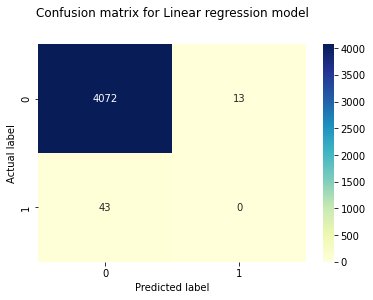

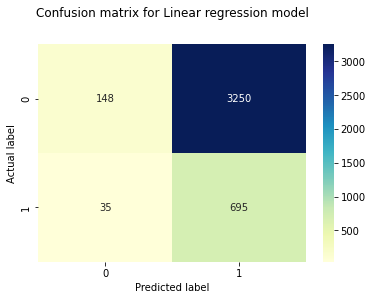

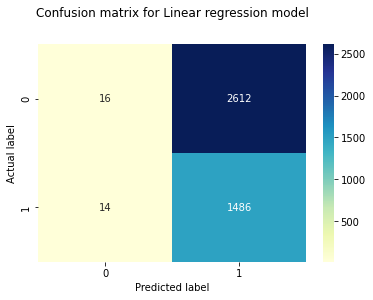

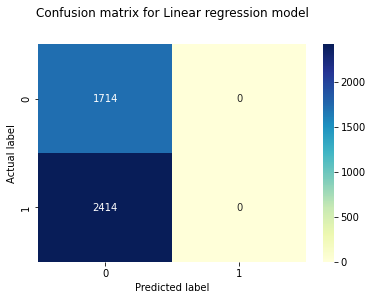

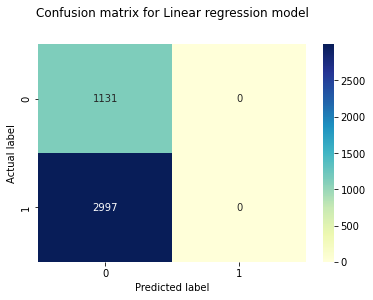

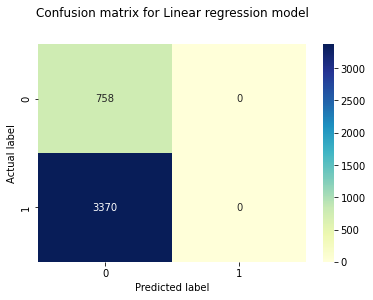

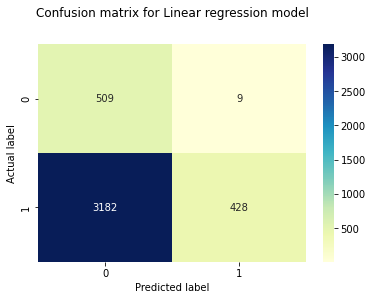

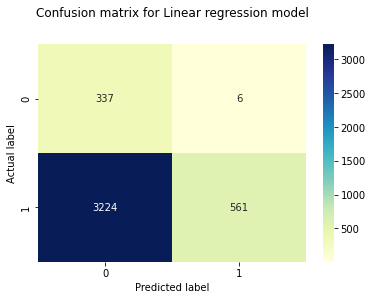

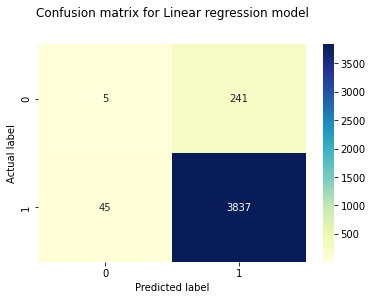

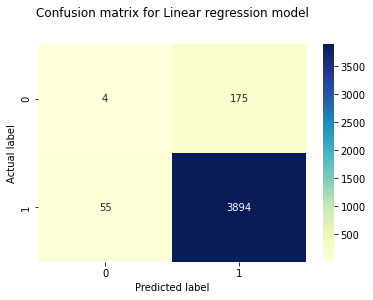

In [531]:
# All the models confusion matrices
for matrix in compute_confusion_matrix(lables_test_collection, predictions_lr):
  sns.heatmap(matrix, annot=True, cmap="YlGnBu" ,fmt='g')
  plt.title('Confusion matrix for Linear regression model', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.show()

In [532]:
# All the models accuracy scores
for score in get_accuracy_scores(lables_test_collection, predictions_lr):
  print("Accuracy score: {}".format(score))

Accuracy score: 0.9864341085271318
Accuracy score: 0.20421511627906977
Accuracy score: 0.3638565891472868
Accuracy score: 0.41521317829457366
Accuracy score: 0.27398255813953487
Accuracy score: 0.18362403100775193
Accuracy score: 0.22698643410852712
Accuracy score: 0.21753875968992248
Accuracy score: 0.9307170542635659
Accuracy score: 0.9442829457364341


In [533]:
print("Averge accuracy score:" + str(get_accuracy_scores_average(lables_test_collection, predictions_lr)))

Averge accuracy score:0.4746850775193798


In [534]:
for report in compute_classification_report(lables_test_collection, predictions_lr):
  print("Classification report:\n" + report)

Classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4085
           1       0.00      0.00      0.00        43

    accuracy                           0.99      4128
   macro avg       0.49      0.50      0.50      4128
weighted avg       0.98      0.99      0.98      4128

Classification report:
              precision    recall  f1-score   support

           0       0.81      0.04      0.08      3398
           1       0.18      0.95      0.30       730

    accuracy                           0.20      4128
   macro avg       0.49      0.50      0.19      4128
weighted avg       0.70      0.20      0.12      4128

Classification report:
              precision    recall  f1-score   support

           0       0.53      0.01      0.01      2628
           1       0.36      0.99      0.53      1500

    accuracy                           0.36      4128
   macro avg       0.45      0.50      0.27      4128
weigh

c:\Users\tebogo.nkwane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tebogo.nkwane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tebogo.nkwane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

In [535]:
# how to use the model 
# predict value and then the value of first 1 in the array is most likly the ranage of the value of the house 
# 0 means definetly higher than the limit and 1 means definetly lower than the limit therefore first 1 will most likely fall in that range this index corresponds 
# to the value of the rnages (e.g 250000-350000)

# Numerically
# [0,0,0,1,1,1,1,1,1,1] --> this would mean the house is between 150k and 200k

 ## Fine-tune your models [10] BONUS [10]

 hint!
- We manually tuned our model in the class (this is not efficient)

try:
- GridSearchCV from sklearn (self-improvement)
- esemble methods
- evaluate your models on the test set

In [536]:
#Fine tuning linear regression model (Using KFold cross validation)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [537]:
score_after_tuning = 0
for i in range(len(models)):
  Kfold = KFold(n_splits=10)
  results = cross_val_score(models[i], features_train_collection[i], lables_train_collection[i], cv=Kfold)
  print(results)
  score_after_tuning += results.mean()
  print(results.mean())

print("Average Score after tuning: {}".format(score_after_tuning/len(models)))

[0.98910412 0.98910412 0.99576015 0.99333737 0.99212598 0.99152029
 0.98788613 0.98970321 0.98667474 0.9903089 ]
0.9905525010156
[0.88438257 0.88559322 0.89339794 0.89036947 0.8879467  0.89521502
 0.88855239 0.88188976 0.89945488 0.89460933]
0.8901411280565157
[0.84624697 0.8401937  0.85099939 0.82677165 0.84554815 0.85645064
 0.85160509 0.85221078 0.84615385 0.85523925]
0.8471419478692933
[0.80266344 0.79479419 0.80254391 0.80314961 0.79043004 0.79164143
 0.78982435 0.79043004 0.8037553  0.79648698]
0.7965719286718886
[0.8377724  0.83414044 0.83343428 0.83767414 0.84433677 0.84857662
 0.82737735 0.82919443 0.84554815 0.84009691]
0.8378151476176299
[0.87530266 0.87469734 0.87764991 0.88310115 0.88067838 0.89460933
 0.88552392 0.88612962 0.88188976 0.87583283]
0.8815414900060571
[0.92736077 0.90677966 0.91035736 0.92610539 0.91762568 0.92247123
 0.92368262 0.924894   0.91278013 0.91096305]
0.9183019902825056
[0.94067797 0.93886199 0.93882495 0.95033313 0.93943065 0.94791036
 0.94609328 

# RANDOM FOREST TREE

In [538]:
#add a column that will classify the median house value as low or high, where low will be represented by 0 and high will be represented by 1
def calculatehome_value_code(df_row):
    if df_row["median_house_value"] < 100000:
        house_value = 0
    else:
        house_value = 1
    return house_value

home_df["value_code"] = home_df.apply(calculatehome_value_code, axis =1)

In [539]:
home_df.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,...,INLAND,NEAR OCEAN,ISLAND,people_per_household,rooms_per_household,bedrooms_per_household,people_per_bedroom,home_with_old_age_majority,bedrooms_as_percentage_of_rooms,value_code
1606,-122.08,37.88,26.0,2947.0,537.870553,825.0,626.0,2.9330,85000.0,1,...,0,0,0,1.317891,4.707668,0.859218,1.533826,0,0.182515,0
14962,-116.91,32.75,5.0,8710.0,1614.000000,4372.0,1527.0,4.7813,240900.0,0,...,0,0,0,2.863130,5.703995,1.056974,2.708798,0,0.185304,1
9624,-120.31,37.29,36.0,969.0,206.000000,732.0,175.0,1.5938,57600.0,0,...,1,0,0,4.182857,5.537143,1.177143,3.553398,0,0.212590,0
13447,-117.41,34.11,12.0,6758.0,1550.000000,3204.0,1279.0,2.5181,105500.0,0,...,1,0,0,2.505082,5.283815,1.211884,2.067097,0,0.229358,1
9192,-118.29,34.36,34.0,503.0,99.000000,275.0,68.0,4.5491,375000.0,0,...,1,0,0,4.044118,7.397059,1.455882,2.777778,0,0.196819,1
12213,-117.18,33.51,13.0,270.0,42.000000,120.0,42.0,6.9930,500001.0,0,...,0,0,0,2.857143,6.428571,1.000000,2.857143,0,0.155556,1
10885,-117.92,33.70,15.0,3201.0,537.870553,1510.0,622.0,4.2708,161700.0,0,...,0,0,0,2.427653,5.146302,0.864744,2.807367,0,0.168032,1
20421,-118.83,34.17,17.0,4668.0,628.000000,1917.0,624.0,8.1397,353900.0,0,...,0,0,0,3.072115,7.480769,1.006410,3.052548,0,0.134533,1
19046,-121.85,38.43,2.0,790.0,135.000000,235.0,87.0,5.0862,166500.0,0,...,1,0,0,2.701149,9.080460,1.551724,1.740741,0,0.170886,1
8389,-118.36,33.97,18.0,1284.0,283.000000,990.0,289.0,4.0179,195800.0,0,...,0,0,0,3.425606,4.442907,0.979239,3.498233,0,0.220405,1


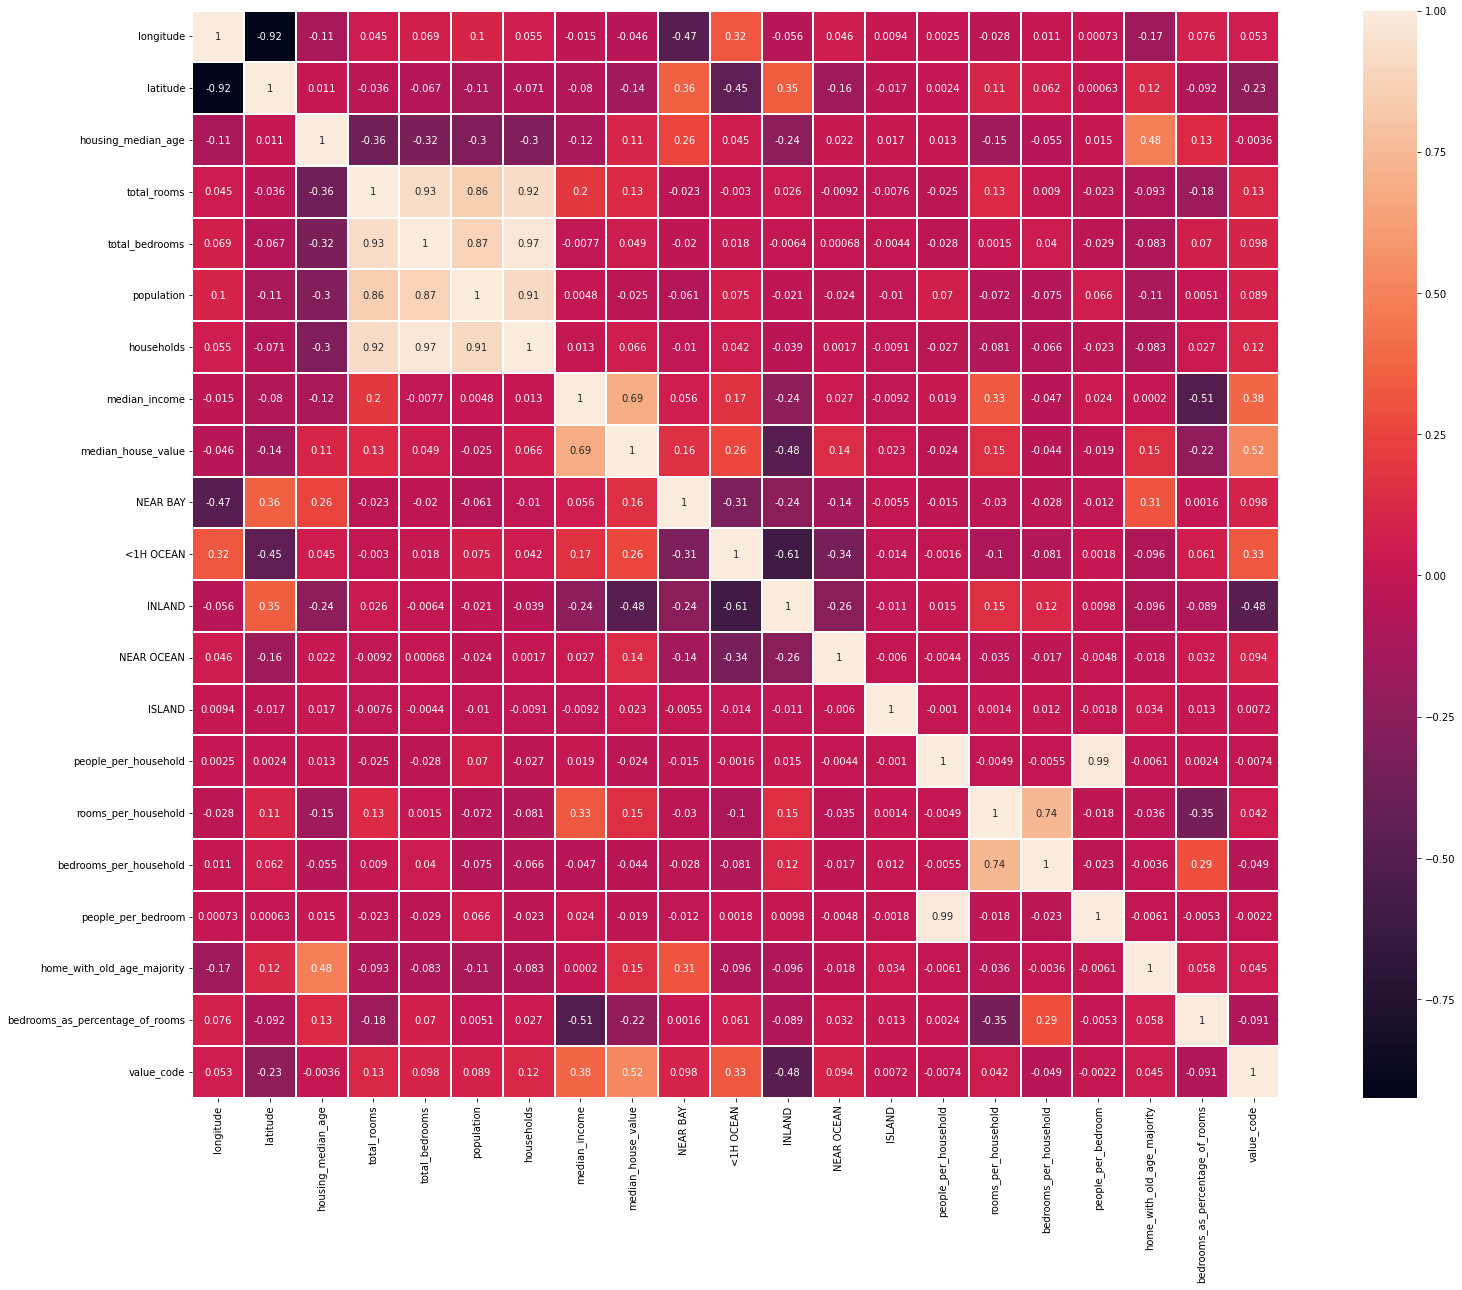

In [540]:
plt.figure(figsize=(30,20))
sns.heatmap(home_df.corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [541]:
abs(home_df.corr()['value_code']).sort_values(ascending=False)

value_code                         1.000000
median_house_value                 0.520483
INLAND                             0.482066
median_income                      0.378564
<1H OCEAN                          0.326270
latitude                           0.226820
total_rooms                        0.127816
households                         0.116115
total_bedrooms                     0.098484
NEAR BAY                           0.097599
NEAR OCEAN                         0.094226
bedrooms_as_percentage_of_rooms    0.091079
population                         0.088878
longitude                          0.052732
bedrooms_per_household             0.049168
home_with_old_age_majority         0.044960
rooms_per_household                0.042091
people_per_household               0.007427
ISLAND                             0.007150
housing_median_age                 0.003556
people_per_bedroom                 0.002194
Name: value_code, dtype: float64

In [542]:
home_df.shape

(20640, 21)

In [543]:
lables = home_df['value_code']
features = home_df[['bedrooms_as_percentage_of_rooms','median_income', 'INLAND', '<1H OCEAN', 'NEAR BAY', 'rooms_per_household', 'home_with_old_age_majority', 'latitude', 'NEAR OCEAN', 'total_rooms', 'housing_median_age']]
lables.sample(5)

14331    1
7208     1
14722    1
8975     1
18162    1
Name: value_code, dtype: int64

In [544]:
features.sample(5)

,bedrooms_as_percentage_of_rooms,median_income,INLAND,<1H OCEAN,NEAR BAY,rooms_per_household,home_with_old_age_majority,latitude,NEAR OCEAN,total_rooms,housing_median_age
6066,0.150866,6.6288,0,1,0,6.802554,0,34.04,0,27700.0,7.0
587,0.180346,4.6500,0,0,1,5.578755,0,37.71,0,4569.0,36.0
3555,0.231341,3.0347,0,1,0,4.505810,0,34.23,0,6592.0,17.0
15012,0.209713,3.1410,0,0,0,5.073600,0,32.76,1,3171.0,43.0
14407,0.276664,4.0313,0,0,0,3.996795,0,32.77,1,2494.0,35.0


In [545]:
features_train, features_test, lables_train, lables_test = train_test_split(features, lables, test_size=0.25, random_state=32)

In [546]:
#Random Forest Model

#Gaussan classifier for random forrest
clf =  RandomForestClassifier()

clf.fit(features_train,lables_train)

random_predictor = clf.predict(features_test)

In [547]:
#Showing the accuracy of the random forest
accuracy_score(lables_test,random_predictor)

0.9174418604651163

In [548]:
#Confusion Matrix for random forest
r_tree_matrix = confusion_matrix(random_predictor, lables_test)
r_tree_matrix

array([[ 646,  180],
       [ 246, 4088]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

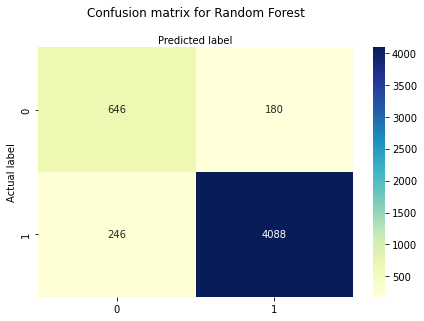

In [549]:
class_names=["Locally produced","Imported"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(r_tree_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [550]:
print(classification_report(lables_test, random_predictor))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       892
           1       0.94      0.96      0.95      4268

    accuracy                           0.92      5160
   macro avg       0.86      0.84      0.85      5160
weighted avg       0.92      0.92      0.92      5160



# Fine Tuning Random Forest

In [551]:
#fine tuning random tree

#number of trees in forest
n_estimators = [int (x) for x in np.linspace(start = 10, stop = 80, num = 10)]

#number of features to consider at every split
max_features = ["auto","sqrt"]

#minimum number of samples requred
min_samples_split = [2,5]

#method of selecting samples for training tree
bootstrap = [True,False]

#Creating a random grid
grid_param = {"n_estimators":n_estimators,
             "max_features":max_features,
             "min_samples_split": min_samples_split,
             "bootstrap":bootstrap}
print(grid_param)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5], 'bootstrap': [True, False]}


In [552]:
rf_grid = GridSearchCV(estimator=clf, param_grid= grid_param, cv=3,verbose=2,n_jobs=4)

In [553]:
#fitting random forrest into rf_grid
rf_grid.fit(features_train, lables_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [554]:
#comparing the accuracy of the tuned random forest model with base model
print(f"Base model: {accuracy_score(lables_test,random_predictor)}")
print(f"test accuracy: {rf_grid.score(features_test,lables_test)}")

Base model: 0.9174418604651163
test accuracy: 0.9156976744186046


# K-Means Clustering

In [587]:
home_df = home_df_copy.copy()

#add a column that will classify the median house value as low or high, where low will be represented by 0 and high will be represented by 1
def calculatehome_value_code(df_row):
    if df_row["median_house_value"] < 100000:
        house_value = 0
    else:
        house_value = 1
    return house_value

home_df["value_code"] = home_df.apply(calculatehome_value_code, axis =1)

In [588]:
home_df.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,...,INLAND,NEAR OCEAN,ISLAND,people_per_household,rooms_per_household,bedrooms_per_household,people_per_bedroom,home_with_old_age_majority,bedrooms_as_percentage_of_rooms,value_code
5617,-118.26,33.79,42.0,1162.0,264.0,1044.0,241.0,3.5488,205600.0,0,...,0,0,0,4.331950,4.821577,1.095436,3.954545,0,0.227194,1
13294,-117.64,34.08,37.0,2576.0,468.0,1284.0,428.0,3.3958,130400.0,0,...,1,0,0,3.000000,6.018692,1.093458,2.743590,0,0.181677,1
9357,-122.54,37.96,33.0,2534.0,495.0,996.0,449.0,4.3083,500001.0,1,...,0,0,0,2.218263,5.643653,1.102450,2.012121,0,0.195343,1
747,-122.09,37.66,40.0,1340.0,313.0,766.0,271.0,3.4722,135400.0,1,...,0,0,0,2.826568,4.944649,1.154982,2.447284,0,0.233582,1
7496,-118.25,33.93,27.0,581.0,135.0,647.0,131.0,3.2917,83100.0,0,...,0,0,0,4.938931,4.435115,1.030534,4.792593,0,0.232358,0
16955,-122.30,37.53,40.0,1833.0,308.0,751.0,306.0,6.0000,384200.0,0,...,0,1,0,2.454248,5.990196,1.006536,2.438312,0,0.168031,1
16072,-122.49,37.75,48.0,2387.0,424.0,1041.0,408.0,3.7562,321200.0,0,...,0,1,0,2.551471,5.850490,1.039216,2.455189,0,0.177629,1
14594,-117.18,32.83,31.0,1772.0,353.0,1090.0,350.0,3.9265,162000.0,0,...,0,1,0,3.114286,5.062857,1.008571,3.087819,0,0.199210,1
16857,-122.40,37.62,32.0,3586.0,921.0,2249.0,911.0,3.1058,253000.0,0,...,0,1,0,2.468716,3.936334,1.010977,2.441911,0,0.256832,1
1342,-121.92,38.02,8.0,2750.0,479.0,1526.0,484.0,5.1020,156500.0,0,...,1,0,0,3.152893,5.681818,0.989669,3.185804,0,0.174182,1


In [589]:
home_df.drop(['median_house_value'], axis=1, inplace=True)
home_df.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND,people_per_household,rooms_per_household,bedrooms_per_household,people_per_bedroom,home_with_old_age_majority,bedrooms_as_percentage_of_rooms,value_code
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,0,0,1,0,0,2.773585,4.991614,0.951782,2.914097,0,0.190676,1
19527,-120.96,37.64,41.0,1467.0,328.0,673.0,310.0,2.7917,0,0,1,0,0,2.170968,4.732258,1.058065,2.051829,0,0.223586,0
14230,-117.04,32.69,9.0,3417.0,860.0,2521.0,828.0,3.0200,0,0,0,1,0,3.044686,4.126812,1.038647,2.931395,0,0.251683,1
15634,-122.41,37.80,52.0,1866.0,748.0,2957.0,710.0,1.8295,1,0,0,0,0,4.164789,2.628169,1.053521,3.953209,1,0.400857,1
7534,-118.23,33.91,34.0,1060.0,276.0,1215.0,250.0,2.0804,0,1,0,0,0,4.860000,4.240000,1.104000,4.402174,0,0.260377,0
4283,-118.32,34.09,34.0,1478.0,675.0,1976.0,653.0,2.0557,0,1,0,0,0,3.026034,2.263400,1.033691,2.927407,0,0.456698,1
3808,-118.46,34.20,13.0,2926.0,816.0,1867.0,802.0,3.5255,0,1,0,0,0,2.327930,3.648379,1.017456,2.287990,0,0.278879,1
15325,-117.34,33.19,23.0,3546.0,553.0,1533.0,518.0,5.2760,0,0,0,1,0,2.959459,6.845560,1.067568,2.772152,0,0.155950,1
10145,-117.90,33.91,33.0,4181.0,804.0,2049.0,834.0,4.3103,0,1,0,0,0,2.456835,5.013189,0.964029,2.548507,0,0.192298,1
1413,-122.07,37.94,43.0,1454.0,234.0,683.0,258.0,4.4750,1,0,0,0,0,2.647287,5.635659,0.906977,2.918803,0,0.160935,1


In [590]:
abs(home_df.corr()['value_code']).sort_values(ascending=False)

value_code                         1.000000
INLAND                             0.482066
median_income                      0.378564
<1H OCEAN                          0.326270
latitude                           0.226820
total_rooms                        0.127816
households                         0.116115
total_bedrooms                     0.098484
NEAR BAY                           0.097599
NEAR OCEAN                         0.094226
bedrooms_as_percentage_of_rooms    0.091079
population                         0.088878
longitude                          0.052732
bedrooms_per_household             0.049168
home_with_old_age_majority         0.044960
rooms_per_household                0.042091
people_per_household               0.007427
ISLAND                             0.007150
housing_median_age                 0.003556
people_per_bedroom                 0.002194
Name: value_code, dtype: float64

In [591]:
lables = home_df['value_code']
features = home_df[['INLAND','median_income', '<1H OCEAN', 'latitude', 'total_rooms', 'households', 'total_bedrooms', 'NEAR BAY', 'NEAR OCEAN', 'bedrooms_as_percentage_of_rooms', 'population']]
lables.sample(5)

4904     1
4186     1
13165    1
8869     1
7634     1
Name: value_code, dtype: int64

In [592]:
features.sample(5)

,INLAND,median_income,<1H OCEAN,latitude,total_rooms,households,total_bedrooms,NEAR BAY,NEAR OCEAN,bedrooms_as_percentage_of_rooms,population
11389,0,3.8187,0,33.64,1851.0,363.0,495.0,0,1,0.267423,792.0
18731,1,3.0954,0,40.55,3753.0,738.0,761.0,0,0,0.202771,1952.0
15520,0,2.6152,1,33.13,6817.0,1474.0,1632.0,0,0,0.239401,4526.0
2285,1,2.9937,0,36.79,2258.0,423.0,427.0,0,0,0.189105,1076.0
14830,0,2.0213,0,32.67,1690.0,494.0,541.0,0,1,0.320118,1669.0


In [593]:
features = StandardScaler().fit_transform(features)

In [594]:
features_train, features_test, lables_train, lables_test = train_test_split(features, lables, test_size=0.25, random_state=32)

In [604]:
# create K-Means Clustering model
km = KMeans(n_clusters=10, max_iter=600)
km.fit(features_train)
y_kmeans = km.predict(features_test)
  

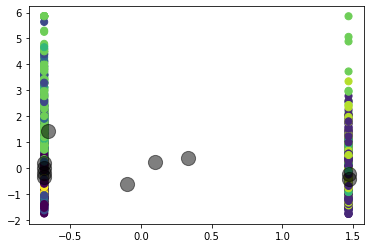

In [605]:
plt.scatter(features_test[:, 0], features_test[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

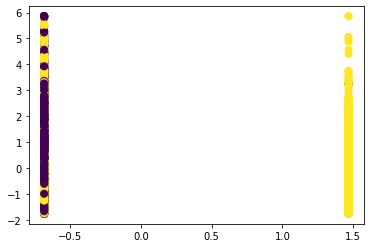

In [609]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(features, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(features.shape[0])[:n_clusters]
    centers = features[i]
    
    while True:
        # Assign labels based on closest center
        labels = pairwise_distances_argmin(features, centers)
        new_centers = np.array([features[labels == i].mean(0)
                                for i in range(n_clusters)])

        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

# change value to see possible clusterings 
centers, labels = find_clusters(features, 2)
plt.scatter(features[:, 0], features[:, 1], c=labels,
            s=50, cmap='viridis')

## Present your solution [20].

 hint!
- you do not need machine learning knowledge to write a report
- Report your choosen solution and justify it

### Interpreting Logistic Regression
All the accuracy values have improved, the significance of the improvements is clear for mid-range predictions. The upper and lower accuracy bands of the house values stayed the same with slight improvements. 

From the initial accuracy models we see that is is pretty easy to predict house value ranges in the extrmes -- high and low value houses 
but the mid-range does not have high scores ofo accuracy .... does this tie to the fact that south africa is the most unequal country in terms of poverty? Or this 
can mean we have less data on the mid-range houses and more on high and low value houses.

### Interpreting The random forest
The initial random tree model (Base model) had an accuracy score of 91.58%. Looking at the confusion matrix of the random forest, the model was correctly able to identify 633 low value houses and 4093 high value houses. wWth it committing a total of 434 errors. When the model was prediction the median house values, it had a precision rating of 0.78 and 0.94 in respect of low value and high value homes. Analysing the performance of the base model shows that the random forest model is very accurate. 
In attempting to fine tune the random forest model, we were able to increace the accuracy score of the model to 91.62%. Though the accuracy of the model has increased, the increase very small and the improvement of the model is also small 

### Interpreting KMeans clustering
This model supports logistic regressions in there being majot amount of data for the low and high value groups but almost no data for mid range 

### ADVISE: Let your objective not be to obtain marks but to understand, experiment and experience! 

### Congratulations! You have achieved a lot if you have completed this project deligently